In [1]:
import pandas as pd
import numpy as np 
from pylab import plt
from scipy.optimize import curve_fit
from scipy.stats import lognorm, kstest


df = pd.read_excel('/Users/ananth/Desktop/salinity_snowdepth.xlsx');

a = df.to_numpy()

In [2]:
df
salinity = df.Sp
snow_depth = df.Snow_depth

# Plot salinity vs snow depth from frey et al 2020 and confer et al 2023

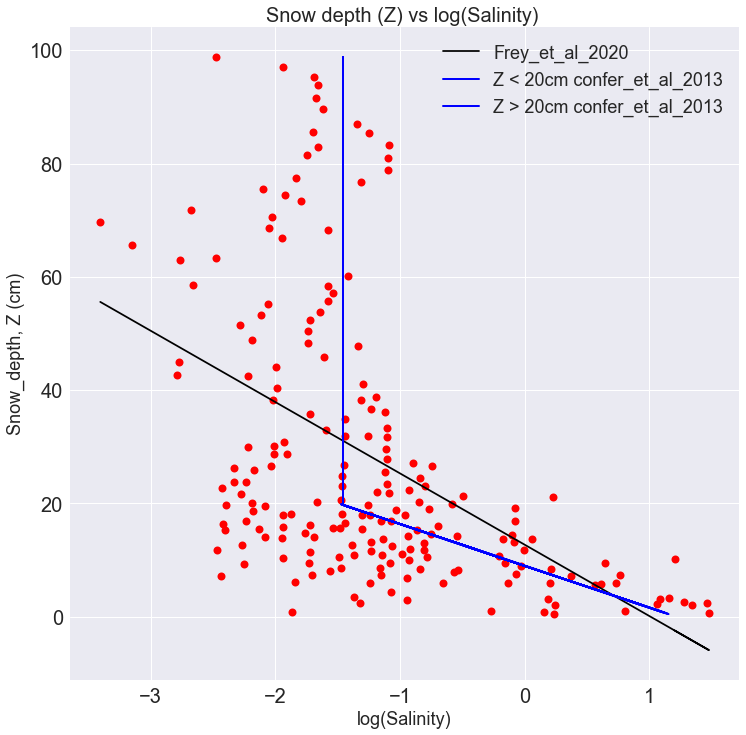

In [3]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn')

sd_slice1 = snow_depth[snow_depth<20]
sd_slice2 = snow_depth[snow_depth>=20]

sp_slice1 = salinity[snow_depth<20]
sp_slice2 = salinity[snow_depth>20]

plt.plot(np.log10(salinity),snow_depth,'r.',markersize = 16)

linear_fit = np.polyfit(np.log10(salinity),snow_depth,1)
Y_fit = np.polyval(linear_fit,np.log10(salinity))
#plt.plot(np.log10(salinity),func_1(salinity,*popt),'k.')
plt.plot(np.log10(salinity),Y_fit,'k-', label = 'Frey_et_al_2020')
#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (Z) vs log(Salinity) ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)

# inserting parametrisation from confer et al 2013

sp_confer_1 = 16.47 * np.exp(-0.312*sd_slice1) # z between 0 and 20 cm 
sp_confer_2 = np.array([0.035]*len(sd_slice2)) # for z >20 cm

plt.plot(np.log10(sp_confer_1), sd_slice1, 'b-', linewidth = 2, label = 'Z < 20cm confer_et_al_2013')
plt.plot(np.log10(sp_confer_2), sd_slice2, 'b-', linewidth = 2, label = 'Z > 20cm confer_et_al_2013')
plt.legend(fontsize = 18)



/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """
/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


Text(0, 0.5, 'Snow_depth, Z (cm)')

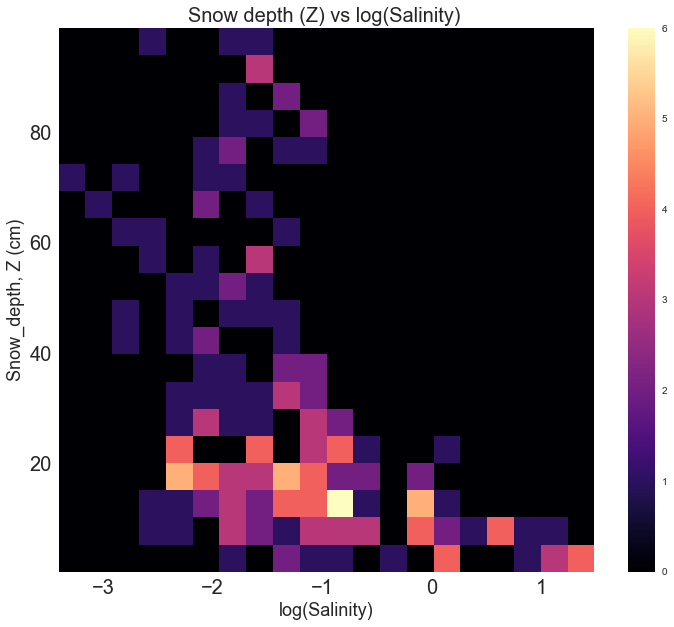

In [4]:
# histogram plot of snowdepth on y axis and salinity on x axis

plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.hist2d(np.log10(salinity),snow_depth, bins = 20, cmap = 'magma')
plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (Z) vs log(Salinity) ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)



Text(0.5, 0, 'log(Salinity)')

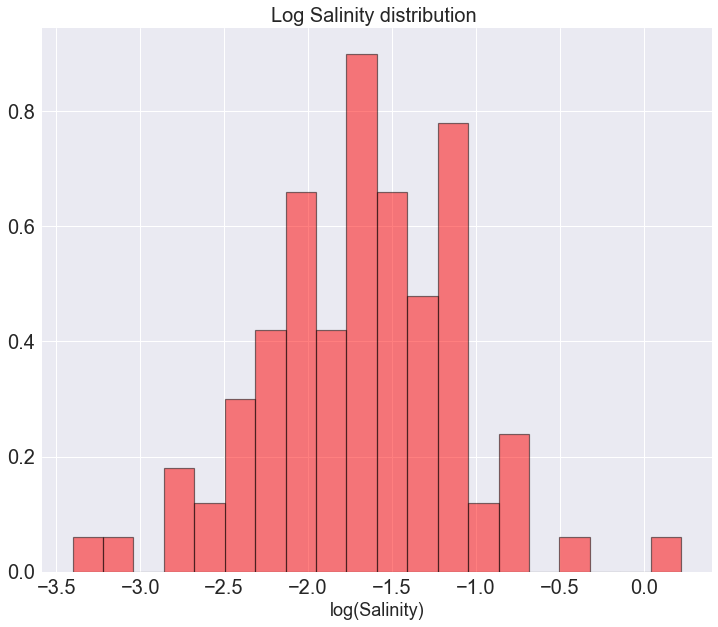

In [5]:
# histogram plot of snowdepth on y axis and salinity on x axis
flag = (snow_depth>20) & (snow_depth<100)
salinity_2 = salinity[flag]
plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)
#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Log Salinity distribution ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)


#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

# Fitting a Normal distribution to the data 

Text(0, 0.5, 'Prabability density')

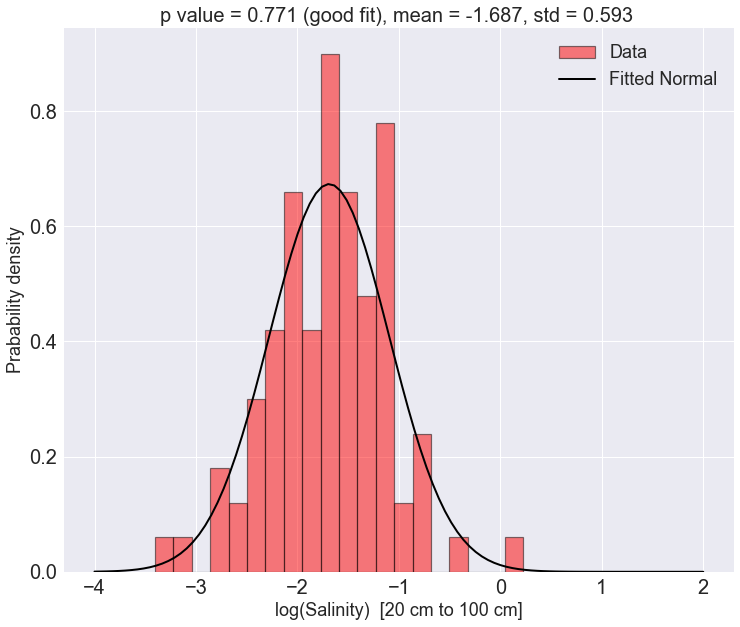

In [7]:
# histogram plot of snowdepth on y axis and salinity on x axis
from scipy.stats import norm

bin1 = 20
bin2 = 100

flag = (snow_depth>bin1) & (snow_depth<bin2)
salinity_2 = salinity[flag]
plt.figure(figsize=(12,10))
plt.style.use('seaborn')
plt.hist(np.log10(salinity_2),bins = 20, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)

mean, std = norm.fit(np.log10(salinity_2))
x = np.linspace(-4, 2, 100)
pdf_fitted = norm.pdf(x, mean, std)

# estimate the p value using the Kolmogorov-Smirnov test
p_value = kstest(np.log10(salinity_2), 'norm', args=(mean, std))[1]
p_value = np.round(p_value, 3)
flag = ''
if p_value > 0.05:
    flag2 = 'good fit'
else:
    flag2 = 'bad fit'


plt.plot(x, pdf_fitted, 'k-', linewidth = 2, label = 'Fitted Normal')
plt.legend(fontsize = 18)

#plt.colorbar()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(f'p value = {p_value} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} ',fontsize = 20)
plt.xlabel(f'log(Salinity)  [{bin1} cm to {bin2} cm]',fontsize = 18)
plt.ylabel('Prabability density',fontsize = 18)
#plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
#plt.yscale('log')


#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

# Plot the above distribution iteratively over all snow depth bins 


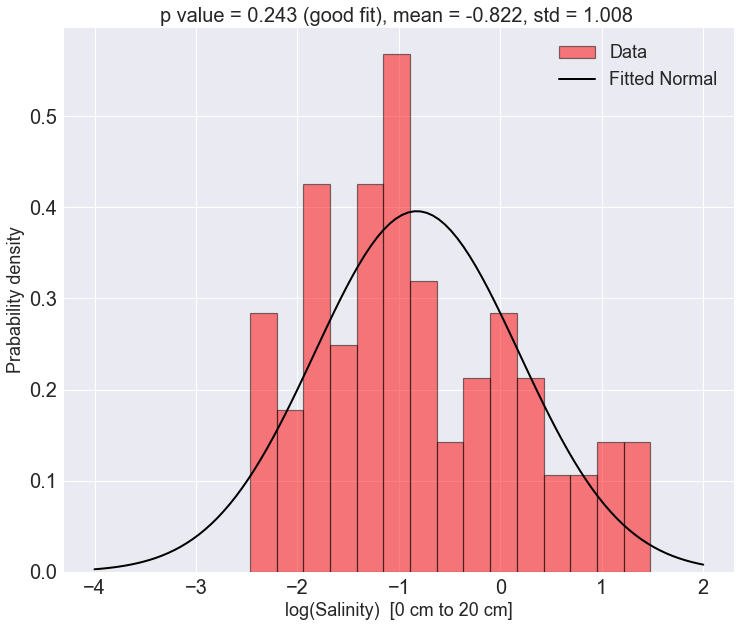

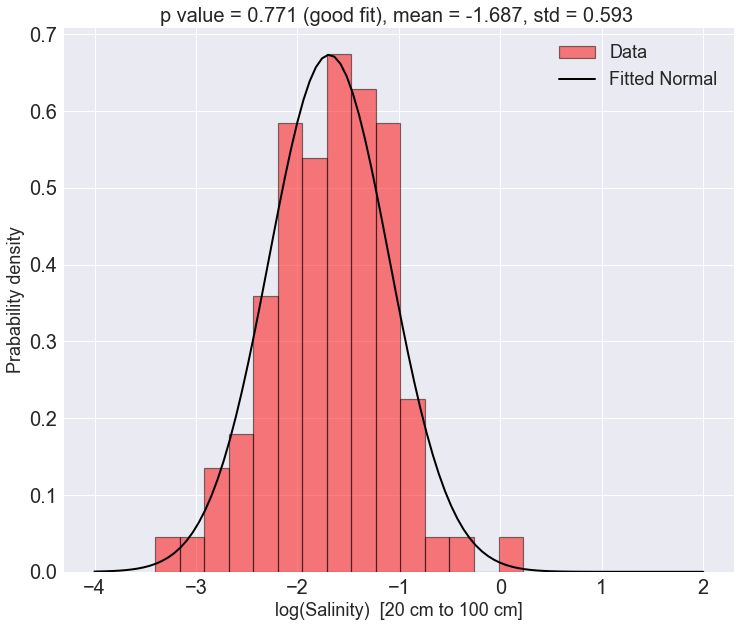

In [7]:
# histogram plot of snowdepth on y axis and salinity on x axis
from scipy.stats import norm

bin_limits = [(i*10, (i+1)*10) for i in range(10)]
bin_limits = [(0,20), (20,100)]
for bin1, bin2 in bin_limits:
    #bin1 = 0
    #bin2 = 10

    flag = (snow_depth>bin1) & (snow_depth<bin2)
    salinity_2 = salinity[flag]
    plt.figure(figsize=(12,10))
    plt.style.use('seaborn')
    plt.hist(np.log10(salinity_2),bins = 15, color = 'r', alpha = 0.5, label = 'Data', edgecolor = 'k', linewidth = 1.2, density = True)

    mean, std = norm.fit(np.log10(salinity_2))
    x = np.linspace(np.min(np.log10(salinity_2)), np.max(np.log10(salinity_2)), 100)
    x = np.linspace(-4,2,100)
    pdf_fitted = norm.pdf(x, mean, std)

    # estimate the p value using the Kolmogorov-Smirnov test
    p_value = kstest(np.log10(salinity_2), 'norm', args=(mean, std))[1]
    p_value = np.round(p_value, 3)
    flag = ''
    if p_value > 0.05:
        flag2 = 'good fit'
    else:
        flag2 = 'bad fit'


    plt.plot(x, pdf_fitted, 'k-', linewidth = 2, label = 'Fitted Normal')
    plt.legend(fontsize = 18)

    #plt.colorbar()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title(f'p value = {p_value} ({flag2}), mean = {round(mean,3)}, std = {round(std,3)} ',fontsize = 20)
    plt.xlabel(f'log(Salinity)  [{bin1} cm to {bin2} cm]',fontsize = 18)
    plt.ylabel('Prabability density',fontsize = 18)
    #plt.ylabel('Snow_depth, Z (cm)',fontsize = 18)
    #plt.yscale('log')


#plt.hist(salinity_slice, bins = 10, density = True, color = 'r', alpha = 0.5, label = 'Data')

# Insert median and Interquartile range to the lognormal fit. 

Snow depth bin:  0  to  10
The fit is not a good fit, p value =  3.1006454352384653e-11
Snow depth bin:  10  to  20
The fit is not a good fit, p value =  2.4120909354847335e-52
Snow depth bin:  20  to  30
The fit is not a good fit, p value =  1.6213172892066683e-71
Snow depth bin:  30  to  40
The fit is not a good fit, p value =  2.129532083088118e-146
Snow depth bin:  40  to  50
The fit is not a good fit, p value =  6.359404386734227e-91
Snow depth bin:  50  to  60
The fit is not a good fit, p value =  1.5167276743200327e-200
Snow depth bin:  60  to  70
The fit is not a good fit, p value =  4.7860966463806934e-30
Snow depth bin:  70  to  80
The fit is not a good fit, p value =  2.023277344903648e-187
Snow depth bin:  80  to  90
The fit is not a good fit, p value =  4.202369378012378e-33
Snow depth bin:  90  to  100
The fit is not a good fit, p value =  0.0


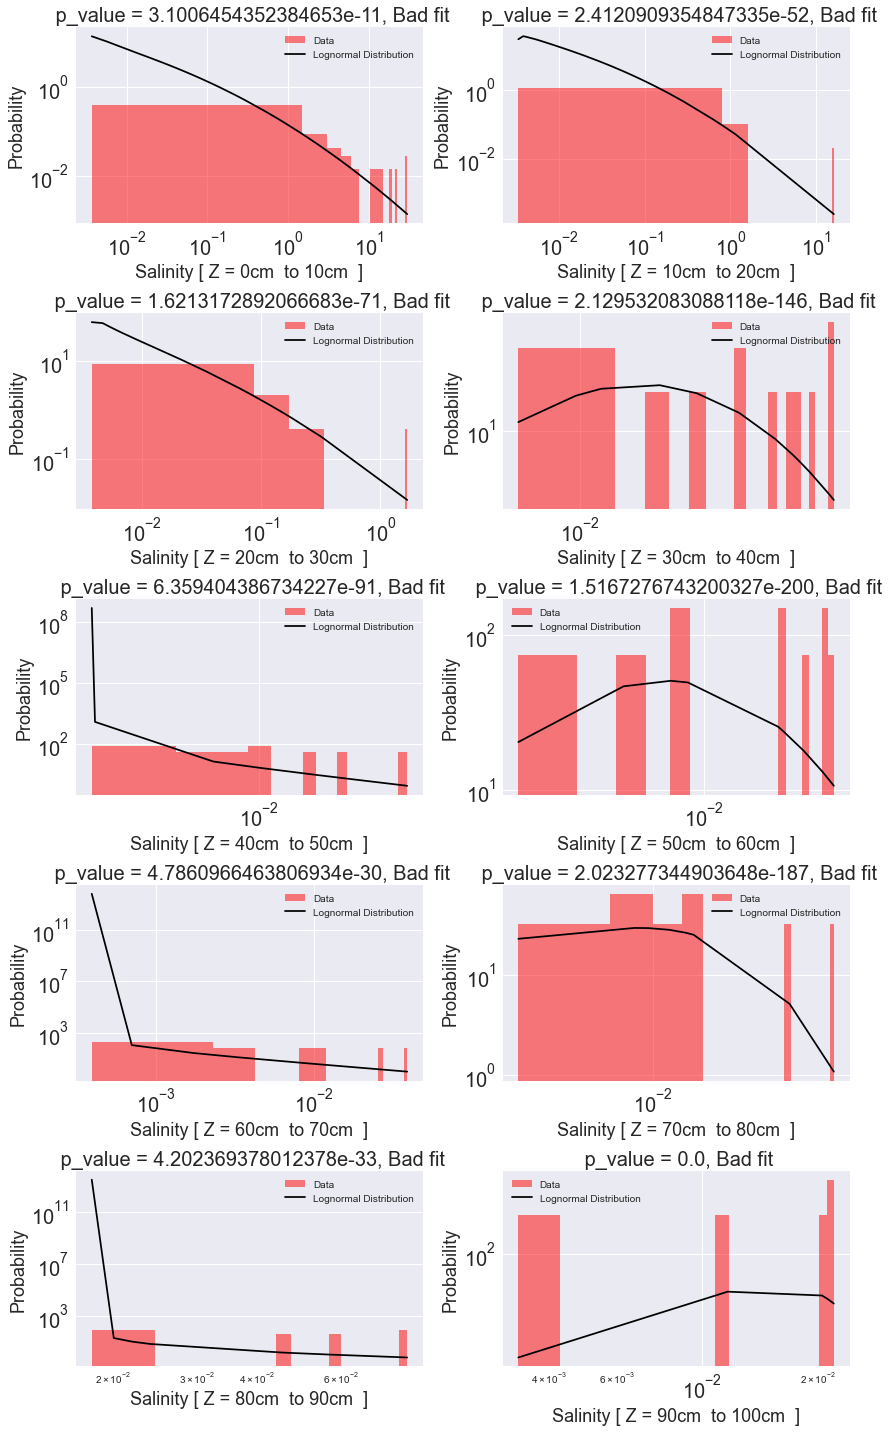

In [25]:
# this is to incorporate the meadian and interquartile range into the estimation of the log normal distribution
depth_bins = np.arange(0,110,10)
#depth_bins = [20, 40]

num_plots = len(depth_bins) - 1
num_cols = 2
num_rows = np.ceil(num_plots/num_cols).astype(int)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 4*num_rows))
plt.style.use('seaborn')

for i in range(num_plots):
    print('Snow depth bin: ', depth_bins[i], ' to ', depth_bins[i+1])
    salinity_slice = salinity[(snow_depth >= depth_bins[i]) & (snow_depth < depth_bins[i+1])]

    # log transform the salinity slice
    log_salinity_slice = np.log(salinity_slice)

    # calculate the median and interquartile range
    median = np.median(log_salinity_slice)
    q1, q3 = np.percentile(log_salinity_slice, [25, 75])
    iqr = q3 - q1

    # estimate the mean and sigma of the log normal distribution
    mean = np.exp(median)
    sigma = np.exp(iqr/2)

    # Fit the log-normal distribution to the log-transformed data
    params = lognorm.fit(salinity_slice, scale=sigma)

    shape = params[0]
    loc   = params[1]
    scale = params[2]

    # kolmogo-smirnov test
    _, p_value = kstest(data, "lognorm", args=params)
    flag = ''
    if p_value > 0.05:
        flag = 'good fit'
        print('The fit is a good fit, p value = ', p_value)
    else:
        flag = 'Bad fit'
        print('The fit is not a good fit, p value = ', p_value)

    
    # mean of the distribution
    mean_1 = np.exp(loc + shape**2/2) * scale 
    # standard deviation of the distribution
    std_1 = np.sqrt(np.exp(shape**2) - 1) * mean_1
   


    #val_str = f'shape = {round(shape,4)}, loc =  {round(loc,4)},  scale = {round(scale,4)}'
    val_str = f'mean = {round(mean_1,4)}, std =  {round(std_1,4)}, p_value = {round(p_value,3)}, {flag}'
    val_str = f' p_value = {p_value}, {flag}'
    
    z_bin = f' [ Z = {depth_bins[i]}cm  to {depth_bins[i+1]}cm  ]'
    pdf = lognorm.pdf(salinity_slice, shape, loc, scale)

    sorted_indices = np.argsort(salinity_slice)
    pdf_sorted = pdf[sorted_indices]
    salinity_sorted = np.sort(salinity_slice)
    
    row = i//num_cols
    col = i%num_cols
    ax[row, col].hist(salinity_slice, bins=20, density=True, color='r', alpha=0.5, label='Data')
    ax[row, col].plot(salinity_sorted, pdf_sorted, 'k-', label='Lognormal Distribution')
    #ax[row, col].set_title('Snow depth bin: [ '+str(depth_bins[i])+' to '+str(depth_bins[i+1])+' ]', fontsize=20)
    ax[row, col].set_title(val_str, fontsize=20)
    ax[row, col].set_xlabel('Salinity'+ z_bin, fontsize=18)
    ax[row, col].set_ylabel('Probability', fontsize=18)
    ax[row, col].set_xscale('log')
    ax[row, col].set_yscale('log')
    ax[row, col].tick_params(axis='both', which='major', labelsize=20)
    ax[row,col].legend()

plt.tight_layout()
plt.legend()
plt.show()


    

# Example of a lognormal fit with random data

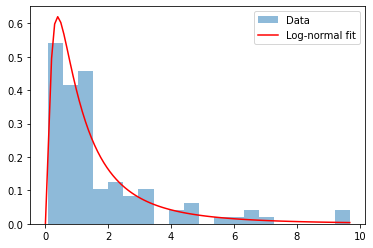

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
data = np.random.lognormal(mean=0, sigma=1, size=100)

# Log-transform the data
log_data = np.log(data)

# Calculate the median and IQR of the log-transformed data
median = np.median(log_data)
IQR = np.percentile(log_data, 75) - np.percentile(log_data, 25)

# Estimate the parameters of the log-normal distribution
mean = np.exp(median)
sigma = np.exp(IQR/2)

# Fit the log-normal distribution to the log-transformed data
fit = stats.lognorm.fit(data, floc=0, scale=sigma)

# Plot the log-normal fit
x = np.linspace(0, data.max(), 100)
pdf = stats.lognorm.pdf(x, fit[0], fit[1], fit[2])
plt.hist(data, bins=20, density=True, alpha=0.5, label='Data')
plt.plot(x, pdf, '-r', label='Log-normal fit')
plt.legend()
plt.show()


In [18]:
data = np.random.lognormal(mean=0, sigma=1, size=100)

In [20]:
data.min()

0.11992022575333514

In [45]:
x = [(i*10,(i+1)*10), bin2 for i in range(10) ]

SyntaxError: invalid syntax (2991582196.py, line 1)

In [46]:
x = [(i*10, (i+1)*10) for i in range(10)]


In [47]:
x

[(0, 10),
 (10, 20),
 (20, 30),
 (30, 40),
 (40, 50),
 (50, 60),
 (60, 70),
 (70, 80),
 (80, 90),
 (90, 100)]

Text(0, 0.5, 'Normalized count')

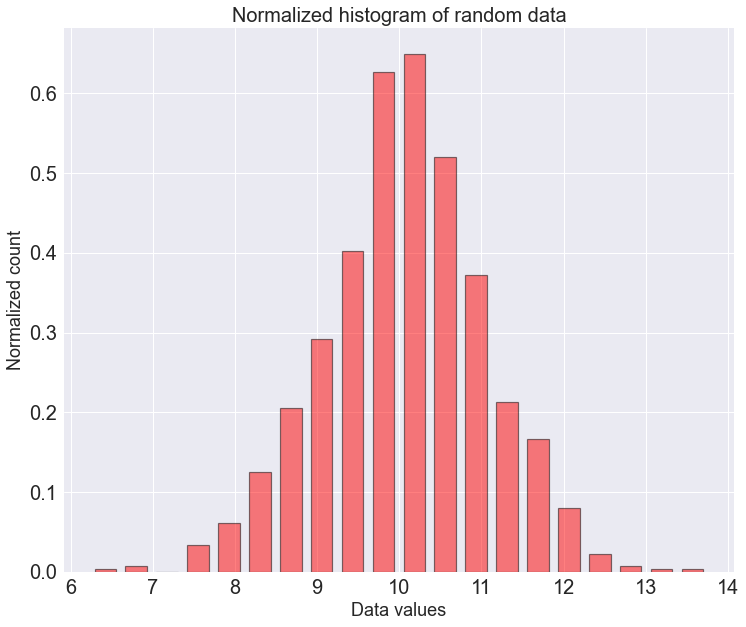

In [54]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(10, 1, 1000)

plt.figure(figsize=(12,10))
plt.style.use('seaborn')

hist, bins = np.histogram(data, bins = 20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist / (len(data) * width), align='center', width=width, color = 'r', alpha = 0.5, edgecolor = 'k', linewidth = 1.2)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Normalized histogram of random data', fontsize = 20)
plt.xlabel('Data values', fontsize = 18)
plt.ylabel('Normalized count', fontsize = 18)


In [12]:
import numpy as np 
x = np.zeros((20,19))
xq = np.random.rand(x.shape[0], x.shape[1])

In [10]:
x.shape

(20, 19)